<a href="https://colab.research.google.com/github/Bhavana123448/NLP1/blob/main/LAB_ASS5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [23]:
df = pd.read_csv(
    'arxiv_data.csv.zip', # Changed filename to include .zip extension
    compression='zip',    # Added compression argument for zipped file
    engine='python',
    nrows=1000
)

df.head()

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"


In [24]:
def preprocess_text(text):
    text = re.sub(r'http\S+|www\S+', '', text)   # Remove URLs
    text = re.sub(r'<.*?>', '', text)            # Remove HTML tags
    text = re.sub(r'@\w+', '', text)             # Remove mentions
    text = re.sub(r'#\w+', '', text)             # Remove hashtags
    text = text.lower()                          # Lowercase

    # Remove emojis
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"
        "\U0001F300-\U0001F5FF"
        "\U0001F680-\U0001F6FF"
        "\U0001F1E0-\U0001F1FF"
        "]+",
        flags=re.UNICODE
    )
    text = emoji_pattern.sub(r'', text)

    text = re.sub(r'[^a-z0-9\s]', '', text)      # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()     # Normalize whitespace

    return text


In [25]:
df['processed_summaries'] = df['summaries'].astype(str).apply(preprocess_text)


In [26]:
df['tokenized_summaries'] = df['processed_summaries'].apply(word_tokenize)


In [27]:
stop_words = set(stopwords.words('english'))

df['filtered_summaries'] = df['tokenized_summaries'].apply(
    lambda tokens: [word for word in tokens if word not in stop_words]
)


In [28]:
lemmatizer = WordNetLemmatizer()

df['lemmatized_summaries'] = df['filtered_summaries'].apply(
    lambda tokens: [lemmatizer.lemmatize(word) for word in tokens]
)


In [29]:
df['clean_summaries'] = df['lemmatized_summaries'].apply(
    lambda tokens: ' '.join(tokens)
)


In [30]:
def nltk_preprocessing_pipeline(text):
    text = preprocess_text(text)
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words]
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    return ' '.join(tokens)


In [31]:
df['clean_summaries_pipeline'] = df['summaries'].astype(str).apply(
    nltk_preprocessing_pipeline
)

/tmp/ipython-input-1501251004.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=top_20_df, palette='viridis')


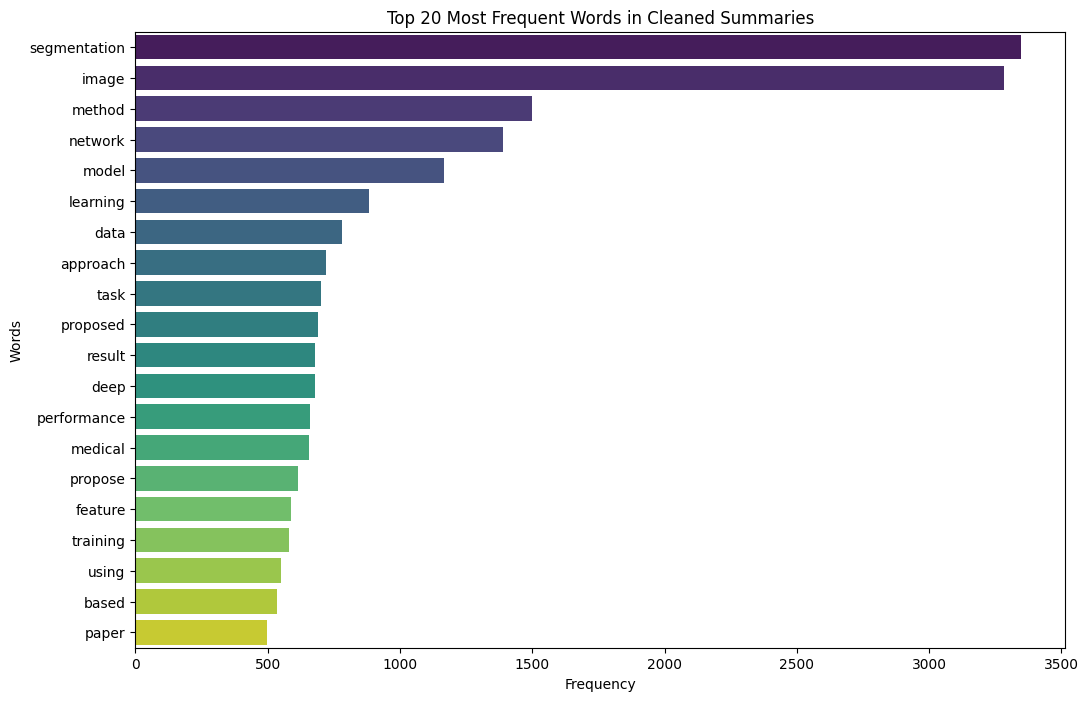

In [35]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

all_cleaned_words = ' '.join(df['clean_summaries_pipeline']).split()
word_counts = Counter(all_cleaned_words)
top_20_words = word_counts.most_common(20)
top_20_df = pd.DataFrame(top_20_words, columns=['Word', 'Count'])
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Word', data=top_20_df, palette='viridis')
plt.title('Top 20 Most Frequent Words in Cleaned Summaries')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

In [36]:
import pandas as pd
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
nlp = spacy.load("en_core_web_sm")

In [39]:
df = pd.read_csv('arxiv_data.csv.zip', compression='zip', engine='python', nrows=1000)
df.head()

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"


In [40]:
import re

def spacy_preprocessing(text):
    # Remove URLs, mentions, hashtags
    text = re.sub(r'http\S+|www\S+|@\w+|#\w+', '', str(text))
    text = text.lower()  # lowercase

    doc = nlp(text)
    tokens = [
        token.lemma_ for token in doc
        if token.is_alpha and token.text not in STOP_WORDS
    ]
    return tokens

df['spacy_tokens'] = df['summaries'].apply(spacy_preprocessing)


In [41]:
all_tokens = [token for sublist in df['spacy_tokens'] for token in sublist]
token_freq = Counter(all_tokens)

# Get top 20 most frequent words
top_tokens = token_freq.most_common(20)
words, counts = zip(*top_tokens)


/tmp/ipython-input-3451893745.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


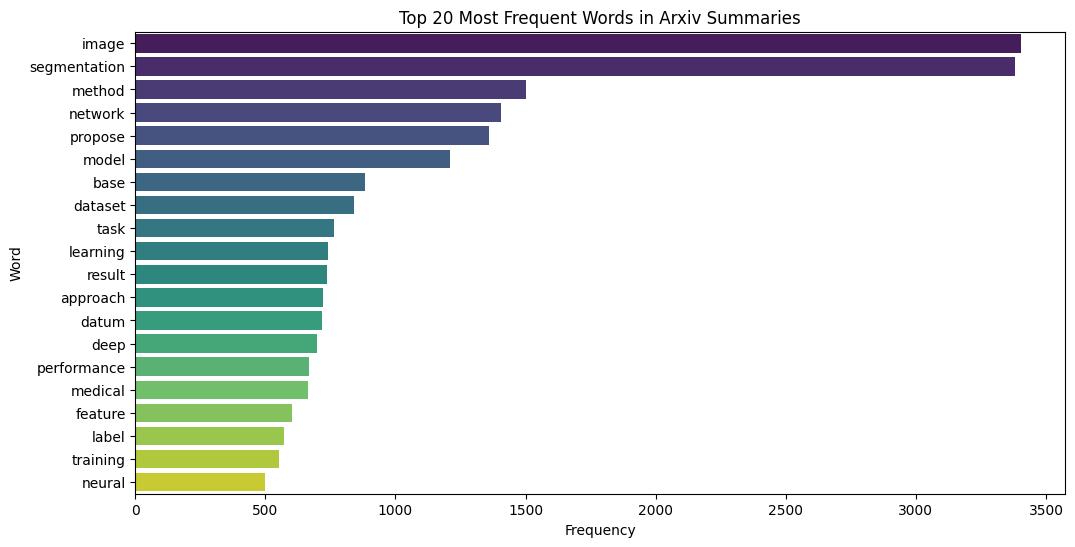

In [42]:
plt.figure(figsize=(12,6))
sns.barplot(x=list(counts), y=list(words), palette="viridis")
plt.title("Top 20 Most Frequent Words in Arxiv Summaries")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/tmp/ipython-input-756514577.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="magma")


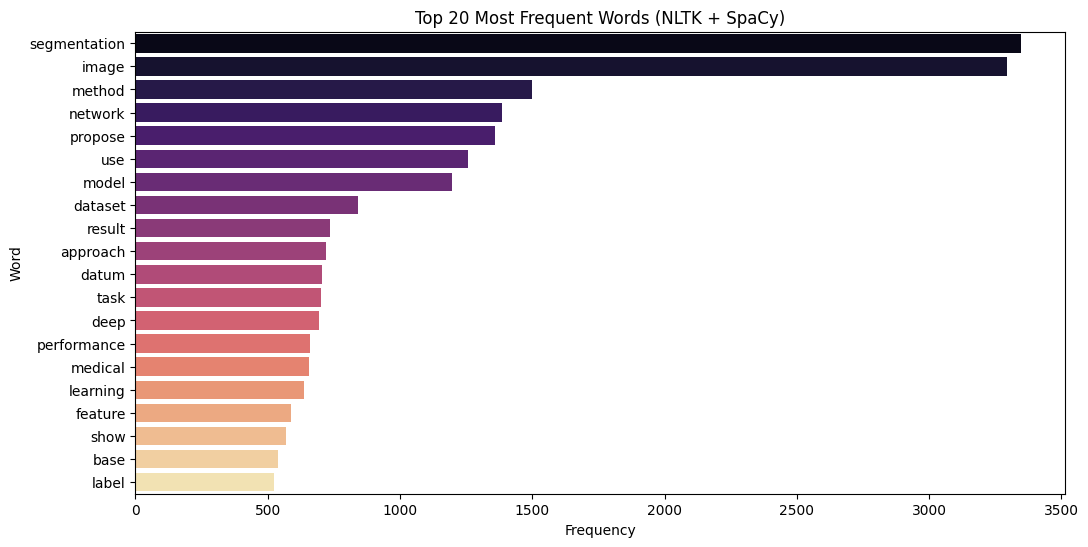

In [44]:
import pandas as pd
import re
import nltk
import spacy
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm")
nltk_stopwords = set(stopwords.words('english'))

def combined_nltk_spacy_preprocess(text):
    text = str(text)
    text = re.sub(r'http\S+|www\S+|@\w+|#\w+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.is_alpha and token.text not in nltk_stopwords]
    clean_text = ' '.join(tokens)
    return clean_text, tokens

# Correcting the file name and adding compression for the zipped CSV file
df = pd.read_csv('arxiv_data.csv.zip', compression='zip', engine='python', nrows=1000)
df[['clean_text', 'tokens']] = df['summaries'].apply(lambda x: pd.Series(combined_nltk_spacy_preprocess(x)))

all_tokens = [token for sublist in df['tokens'] for token in sublist]
token_freq = Counter(all_tokens)
top_tokens = token_freq.most_common(20)
words, counts = zip(*top_tokens)

plt.figure(figsize=(12,6))
sns.barplot(x=list(counts), y=list(words), palette="magma")
plt.title("Top 20 Most Frequent Words (NLTK + SpaCy)")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


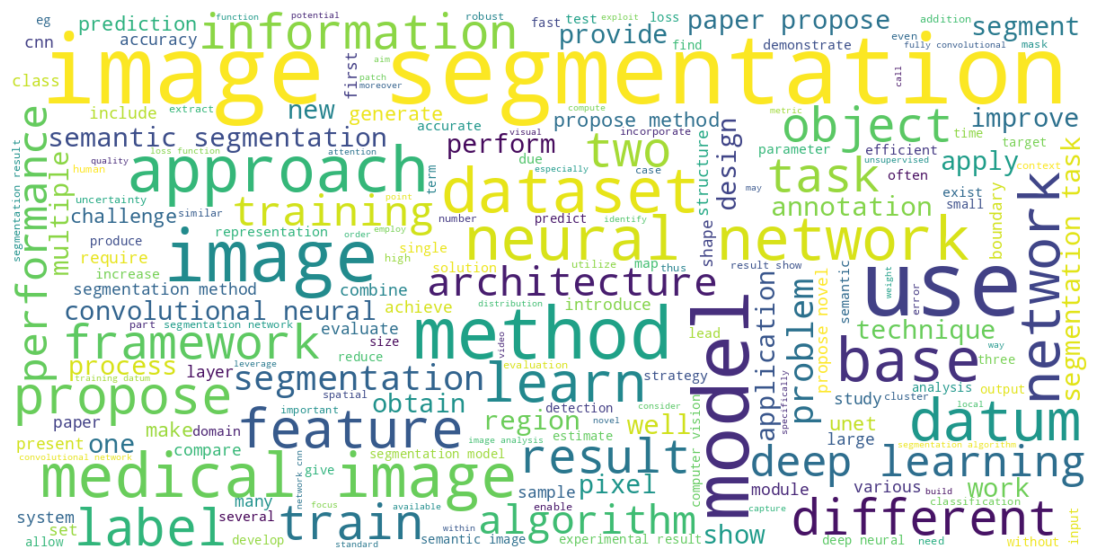

In [46]:
import pandas as pd
import re
import nltk
import spacy
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm")
nltk_stopwords = set(stopwords.words('english'))

def combined_nltk_spacy_preprocess(text):
    text = str(text)
    text = re.sub(r'http\S+|www\S+|@\w+|#\w+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.is_alpha and token.text not in nltk_stopwords]
    clean_text = ' '.join(tokens)
    return clean_text, tokens

# Correcting the file name and adding compression for the zipped CSV file
df = pd.read_csv('arxiv_data.csv.zip', compression='zip', engine='python', nrows=1000)
df[['clean_text', 'tokens']] = df['summaries'].apply(lambda x: pd.Series(combined_nltk_spacy_preprocess(x)))

all_tokens = [token for sublist in df['tokens'] for token in sublist]
text_for_wc = ' '.join(all_tokens)

wordcloud = WordCloud(width=1200, height=600, background_color='white', colormap='viridis').generate(text_for_wc)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()